In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_html("https://fbref.com/pt/comps/24/2023/cronograma/2023-Serie-A-Resultados-e-Calendarios")[0]
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 10)
print(df)

      Sem  Dia        Data Horário              Em casa   xG Resultado  xG.1  \
0     1.0  sáb  2023-04-15   16:00         América (MG)  1.1       0–3   3.1   
1     1.0  sáb  2023-04-15   16:00            Palmeiras  3.0       2–1   1.0   
2     1.0  sáb  2023-04-15   18:30  Red Bull Bragantino  2.0       2–1   0.7   
3     1.0  sáb  2023-04-15   18:30        Botafogo (RJ)  0.9       2–1   2.0   
4     1.0  sáb  2023-04-15   18:30       Ath Paranaense  0.8       2–0   1.0   
..    ...  ...         ...     ...                  ...  ...       ...   ...   
421  38.0  qua  2023-12-06   21:30           Fluminense  2.4       2–3   2.4   
422  38.0  qua  2023-12-06   21:30            São Paulo  0.5       1–0   0.5   
423  38.0  qua  2023-12-06   21:30             Cruzeiro  1.6       1–1   1.4   
424  38.0  qua  2023-12-06   21:30        Internacional  1.2       3–1   0.4   
425  38.0  qua  2023-12-06   21:30        Vasco da Gama  1.6       2–1   0.8   

               Visitante  Público      

In [6]:
resultados = df[['Sem', 'Data', 'Em casa', 'Resultado', 'Visitante']]
resultados = resultados.dropna(how='all')
resultados

,Sem,Data,Em casa,Resultado,Visitante
0,1.0,2023-04-15,América (MG),0–3,Fluminense
1,1.0,2023-04-15,Palmeiras,2–1,Cuiabá
2,1.0,2023-04-15,Red Bull Bragantino,2–1,Bahia
3,1.0,2023-04-15,Botafogo (RJ),2–1,São Paulo
4,1.0,2023-04-15,Ath Paranaense,2–0,Goiás
...,...,...,...,...,...
421,38.0,2023-12-06,Fluminense,2–3,Grêmio
422,38.0,2023-12-06,São Paulo,1–0,Flamengo
423,38.0,2023-12-06,Cruzeiro,1–1,Palmeiras
424,38.0,2023-12-06,Internacional,3–1,Botafogo (RJ)


In [7]:
placar = resultados.loc[:,"Resultado"].str.split("–", n = 1, expand = True)
print(placar)
resultados.loc[:,"CasaResul"] = placar.loc[:,0]
resultados.loc[:,"VisiResul"] = placar.loc[:,1]
resultados = resultados.drop(columns=["Resultado"])
resultados

     0  1
0    0  3
1    2  1
2    2  1
3    2  1
4    2  0
..  .. ..
421  2  3
422  1  0
423  1  1
424  3  1
425  2  1

[380 rows x 2 columns]


,Sem,Data,Em casa,Visitante,CasaResul,VisiResul
0,1.0,2023-04-15,América (MG),Fluminense,0,3
1,1.0,2023-04-15,Palmeiras,Cuiabá,2,1
2,1.0,2023-04-15,Red Bull Bragantino,Bahia,2,1
3,1.0,2023-04-15,Botafogo (RJ),São Paulo,2,1
4,1.0,2023-04-15,Ath Paranaense,Goiás,2,0
...,...,...,...,...,...,...
421,38.0,2023-12-06,Fluminense,Grêmio,2,3
422,38.0,2023-12-06,São Paulo,Flamengo,1,0
423,38.0,2023-12-06,Cruzeiro,Palmeiras,1,1
424,38.0,2023-12-06,Internacional,Botafogo (RJ),3,1


In [8]:

resultados["Vencedor"] = np.where(resultados["CasaResul"] > resultados["VisiResul"], "C", 
                                  np.where(resultados["CasaResul"] < resultados["VisiResul"], "V", "E"))
resultados

,Sem,Data,Em casa,Visitante,CasaResul,VisiResul,Vencedor
0,1.0,2023-04-15,América (MG),Fluminense,0,3,V
1,1.0,2023-04-15,Palmeiras,Cuiabá,2,1,C
2,1.0,2023-04-15,Red Bull Bragantino,Bahia,2,1,C
3,1.0,2023-04-15,Botafogo (RJ),São Paulo,2,1,C
4,1.0,2023-04-15,Ath Paranaense,Goiás,2,0,C
...,...,...,...,...,...,...,...
421,38.0,2023-12-06,Fluminense,Grêmio,2,3,V
422,38.0,2023-12-06,São Paulo,Flamengo,1,0,C
423,38.0,2023-12-06,Cruzeiro,Palmeiras,1,1,E
424,38.0,2023-12-06,Internacional,Botafogo (RJ),3,1,C


In [9]:
#verificando rodada atrasada
resultados[resultados.loc[:,"Sem"] == 15]
resultados.dtypes
print(resultados['CasaResul'].value_counts())
#transformar casa resul e visi resul em numeros
resultados['CasaResul'] = resultados['CasaResul'].astype(int)
resultados['VisiResul'] = resultados['VisiResul'].astype(int)

CasaResul
1    130
0     92
2     92
3     46
4     15
5      4
7      1
Name: count, dtype: int64


In [10]:
resultados['VCasaValor'] = np.where(resultados['Vencedor']=='C',1,np.where(resultados['Vencedor']=='E',0.5,0))
resultados['VVisValor'] = np.where(resultados['Vencedor']=='V',1,np.where(resultados['Vencedor']=='E',0.5,0))
resultados['count'] = 1


In [11]:
primeiro = resultados[resultados.loc[:, "Sem"] < 20]
segundo = resultados[resultados.loc[:, "Sem"] > 19]
print(primeiro.shape)
print(segundo.shape)

(190, 10)
(190, 10)


In [12]:
Casa = resultados.groupby(['Em casa'])[['count', 'VCasaValor','CasaResul','VisiResul']].sum().reset_index()
Casa = Casa.rename(columns={'Em casa':'time', 'CasaResul': 'GolsCasaC', 'VisiResul': 'GolsVisiC'})
Casa

,time,count,VCasaValor,GolsCasaC,GolsVisiC
0,América (MG),19,6.0,21,38
1,Ath Paranaense,19,14.0,33,19
2,Atlético Mineiro,19,12.5,28,16
3,Bahia,19,10.5,29,21
4,Botafogo (RJ),19,13.0,36,17
...,...,...,...,...,...
15,Palmeiras,19,15.0,35,12
16,Red Bull Bragantino,19,13.5,28,14
17,Santos,19,9.5,26,28
18,São Paulo,19,14.5,29,13


In [13]:
Visitante = resultados.groupby(['Visitante'])[['count', 'VVisValor','CasaResul','VisiResul']].sum().reset_index()
Visitante = Visitante.rename(columns={'Visitante':'time', 'CasaResul': 'GolsCasaV', 'VisiResul': 'GolsVisiV'})
Visitante

,time,count,VVisValor,GolsCasaV,GolsVisiV
0,América (MG),19,3.5,43,21
1,Ath Paranaense,19,7.0,24,18
2,Atlético Mineiro,19,11.0,16,24
3,Bahia,19,5.5,32,21
4,Botafogo (RJ),19,10.0,20,22
...,...,...,...,...,...
15,Palmeiras,19,10.0,21,29
16,Red Bull Bragantino,19,9.0,21,21
17,Santos,19,6.5,36,13
18,São Paulo,19,5.0,25,11


In [14]:
Bra = pd.merge(Casa, Visitante, on=['time'])
Bra

,time,count_x,VCasaValor,GolsCasaC,GolsVisiC,count_y,VVisValor,GolsCasaV,GolsVisiV
0,América (MG),19,6.0,21,38,19,3.5,43,21
1,Ath Paranaense,19,14.0,33,19,19,7.0,24,18
2,Atlético Mineiro,19,12.5,28,16,19,11.0,16,24
3,Bahia,19,10.5,29,21,19,5.5,32,21
4,Botafogo (RJ),19,13.0,36,17,19,10.0,20,22
...,...,...,...,...,...,...,...,...,...
15,Palmeiras,19,15.0,35,12,19,10.0,21,29
16,Red Bull Bragantino,19,13.5,28,14,19,9.0,21,21
17,Santos,19,9.5,26,28,19,6.5,36,13
18,São Paulo,19,14.5,29,13,19,5.0,25,11


In [15]:
Bra['W'] = Bra['VCasaValor']+Bra['VVisValor'] #win value
Bra['G'] = Bra['count_x'] + Bra['count_y']  #games
Bra['GF'] = Bra['GolsCasaC']+Bra['GolsVisiV'] #goals for
Bra['GA'] = Bra['GolsVisiC']+Bra['GolsCasaV'] #goals against
Bra

,time,count_x,VCasaValor,GolsCasaC,GolsVisiC,count_y,VVisValor,GolsCasaV,GolsVisiV,W,G,GF,GA
0,América (MG),19,6.0,21,38,19,3.5,43,21,9.5,38,42,81
1,Ath Paranaense,19,14.0,33,19,19,7.0,24,18,21.0,38,51,43
2,Atlético Mineiro,19,12.5,28,16,19,11.0,16,24,23.5,38,52,32
3,Bahia,19,10.5,29,21,19,5.5,32,21,16.0,38,50,53
4,Botafogo (RJ),19,13.0,36,17,19,10.0,20,22,23.0,38,58,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Palmeiras,19,15.0,35,12,19,10.0,21,29,25.0,38,64,33
16,Red Bull Bragantino,19,13.5,28,14,19,9.0,21,21,22.5,38,49,35
17,Santos,19,9.5,26,28,19,6.5,36,13,16.0,38,39,64
18,São Paulo,19,14.5,29,13,19,5.0,25,11,19.5,38,40,38


In [16]:
Bra['wpc'] = Bra['W']/Bra['G'] #win percentage
Bra['pyth'] = Bra['GF']**2/(Bra['GF']**2 + Bra['GA']**2)
Bra

,time,count_x,VCasaValor,GolsCasaC,GolsVisiC,count_y,VVisValor,GolsCasaV,GolsVisiV,W,G,GF,GA,wpc,pyth
0,América (MG),19,6.0,21,38,19,3.5,43,21,9.5,38,42,81,0.250000,0.211892
1,Ath Paranaense,19,14.0,33,19,19,7.0,24,18,21.0,38,51,43,0.552632,0.584494
2,Atlético Mineiro,19,12.5,28,16,19,11.0,16,24,23.5,38,52,32,0.618421,0.725322
3,Bahia,19,10.5,29,21,19,5.5,32,21,16.0,38,50,53,0.421053,0.470898
4,Botafogo (RJ),19,13.0,36,17,19,10.0,20,22,23.0,38,58,37,0.605263,0.710754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Palmeiras,19,15.0,35,12,19,10.0,21,29,25.0,38,64,33,0.657895,0.789971
16,Red Bull Bragantino,19,13.5,28,14,19,9.0,21,21,22.5,38,49,35,0.592105,0.662162
17,Santos,19,9.5,26,28,19,6.5,36,13,16.0,38,39,64,0.421053,0.270785
18,São Paulo,19,14.5,29,13,19,5.0,25,11,19.5,38,40,38,0.513158,0.525624


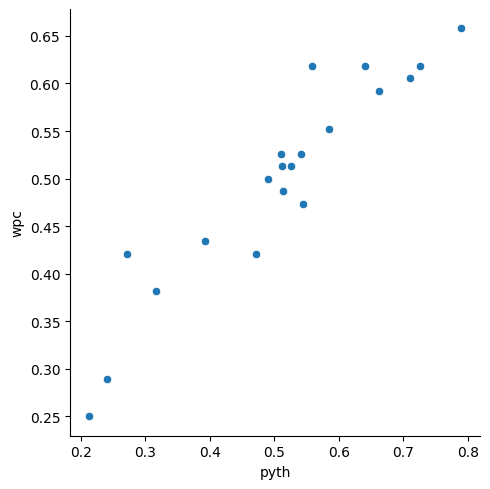

In [17]:
sns.relplot(x="pyth", y = "wpc", data = Bra)

In [18]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=Bra).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     133.2
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           9.45e-10
Time:                        08:41:43   Log-Likelihood:                 37.574
No. Observations:                  20   AIC:                            -71.15
Df Residuals:                      18   BIC:                            -69.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1714      0.030      5.757      0.000       0.109       0.234
pyth           0.6437      0.056     11.540      0.000       0.527       0.761
==============================================================================
Omnibus:                        2.476   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.285
Skew:                           0.612   Prob(JB):                        0.526
Kurtosis:                       3.209   Cond. No.                         8.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""